In [132]:
import pandas as pd

train_bin_results= '/mnt/data/CAMI/DNABERT/rand_train.csv'
val_bin_results = '/mnt/data/CAMI/DNABERT/rand_val.csv'

In [133]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

col_names = ['contig_length', 'method', 'randint']
train_csv = pd.read_csv(train_bin_results, header = None, names=col_names)
train_csv

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/CAMI/DNABERT/rand_train.csv'

In [105]:
col_names = ['contig_length', 'method', 'randint']
val_csv = pd.read_csv(val_bin_results, header = None, names=col_names)
val_csv

0    0.061097
1    0.000898
dtype: float64

In [97]:
val_csv = pd.read_csv(mcc_val_bin_results_500, header = None)
val_csv

,0,1
0,tnf,0.00003


In [98]:
max_val_value_500= train_csv.max(axis=1)
max_val_value_500 

0    0.061097
dtype: float64

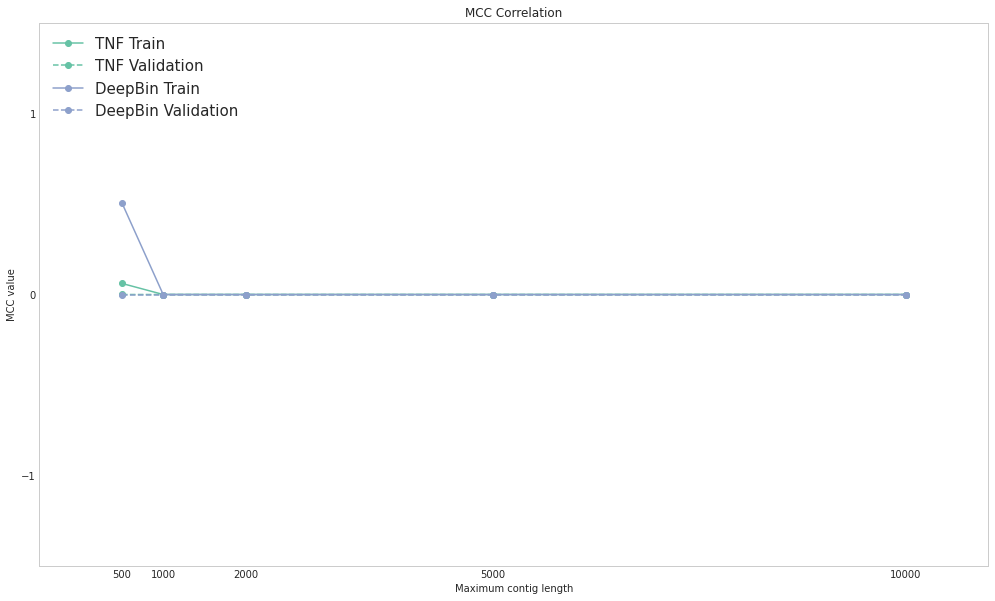

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import numpy as np

#per_data=genfromtxt('result.csv',delimiter=',')

tnf_t_x = [500, 1000, 2000, 5000, 10000]
tnf_t_y = [0.061097, 0, 0, 0, 0]

tnf_v_x = [500, 1000, 2000, 5000, 10000]
tnf_v_y = [0.00003, 0, 0, 0, 0]

train_x = [500, 1000, 2000, 5000, 10000]
train_y = [0.5055302953814708, 0, 0, 0, 0]

val_x = [500, 1000, 2000, 5000, 10000]
val_y = [0, 0, 0, 0, 0]

plt.figure(figsize=(17, 10))

ax = plt.axes()
ax.grid(False)
plt.title("MCC Correlation")
plt.ylabel("MCC value")
plt.xlabel("Maximum contig length")
plt.plot(tnf_t_x, tnf_t_y, label = "TNF Train", linestyle='-', marker='o', color=sns.color_palette('Set2')[0])
plt.plot(tnf_v_x, tnf_v_y, label = "TNF Validation", linestyle='--', marker='o', color=sns.color_palette('Set2')[0])
plt.plot(train_x, train_y, label = "DeepBin Train", linestyle='-', marker='o', color=sns.color_palette('Set2')[2])
plt.plot(val_x, val_y, label = "DeepBin Validation", linestyle='--', marker='o', color=sns.color_palette('Set2')[2])
plt.legend(loc="upper left", prop={'size': 15})
plt.yticks([-1,0,1]) 
plt.xticks([500, 1000, 2000, 5000, 10000]) 
plt.xlim(-500, 11000)
plt.ylim(-1.5, 1.5);
plt.show()